# Problem Set 3
# Alexander Tyan

## Part 1: Image classification (5 points)

In [53]:
import keras
import random
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split
keras.__version__

'2.1.5'

Set your random seed to 1234

In [2]:
random.seed(1234)

Load the MNIST dataset

In [35]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1

In [36]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Randomly split the training data into 50,000 training observations and 10,000 validation observations

In [37]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(train_images, train_labels, test_size=(1/6), random_state=25)

Implement a series of neural network models
- 5 dense, fully-connected layers
- relu activation except for the last layer (use softmax)
- Initialize with 512 hidden units apiece (except for the last layer)
- Use rmsprop optimizer
- Use categorical crossentropy for loss function
- Train with batch_size = 512 and 200 epochs
- Track validation set accuracy during training process

In [38]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [39]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [45]:
history = network.fit(train_images, train_labels, 
                      epochs=10, batch_size=512,
                      validation_data=(x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0062 - acc: 0.9989 - val_loss: 0.0064 - val_acc: 0.9986
Epoch 2/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0068 - acc: 0.9989 - val_loss: 7.2199e-04 - val_acc: 0.9999
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0044 - acc: 0.9993 - val_loss: 0.0043 - val_acc: 0.9993
Epoch 4/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0074 - acc: 0.9990 - val_loss: 0.0310 - val_acc: 0.9952
Epoch 5/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0078 - acc: 0.9987 - val_loss: 0.0025 - val_acc: 0.9994
Epoch 6/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0046 - acc: 0.9992 - val_loss: 0.0034 - val_acc: 0.9998
Epoch 7/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0064 - acc: 0.9992 - val_loss

In [50]:
history = network.fit(train_images, train_labels, 
                      epochs=200, batch_size=512,
                      validation_data=(x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 9s 152us/step - loss: 0.0072 - acc: 0.9987 - val_loss: 0.0015 - val_acc: 0.9999
Epoch 2/200
60000/60000 [==============================] - 10s 163us/step - loss: 0.0049 - acc: 0.9991 - val_loss: 0.0105 - val_acc: 0.9991
Epoch 3/200
60000/60000 [==============================] - 9s 156us/step - loss: 0.0066 - acc: 0.9990 - val_loss: 3.8843e-04 - val_acc: 0.9997
Epoch 4/200
60000/60000 [==============================] - 9s 156us/step - loss: 0.0064 - acc: 0.9990 - val_loss: 0.0120 - val_acc: 0.9978
Epoch 5/200
60000/60000 [==============================] - 9s 153us/step - loss: 0.0050 - acc: 0.9990 - val_loss: 9.6926e-04 - val_acc: 0.9997
Epoch 6/200
60000/60000 [==============================] - 10s 161us/step - loss: 0.0090 - acc: 0.9986 - val_loss: 0.0131 - val_acc: 0.9975
Epoch 7/200
60000/60000 [==============================] - 10s 162us/step - loss: 0.0075 - acc: 0.9988 - v

60000/60000 [==============================] - 10s 159us/step - loss: 0.0077 - acc: 0.9992 - val_loss: 0.0041 - val_acc: 0.9988
Epoch 59/200
60000/60000 [==============================] - 10s 161us/step - loss: 0.0067 - acc: 0.9991 - val_loss: 2.6363e-04 - val_acc: 0.9999
Epoch 60/200
60000/60000 [==============================] - 10s 161us/step - loss: 0.0084 - acc: 0.9990 - val_loss: 0.0061 - val_acc: 0.9985
Epoch 61/200
60000/60000 [==============================] - 10s 161us/step - loss: 0.0056 - acc: 0.9993 - val_loss: 0.0037 - val_acc: 0.9993
Epoch 62/200
60000/60000 [==============================] - 10s 161us/step - loss: 0.0077 - acc: 0.9990 - val_loss: 0.0040 - val_acc: 0.9995
Epoch 63/200
60000/60000 [==============================] - 10s 163us/step - loss: 0.0061 - acc: 0.9992 - val_loss: 7.1783e-04 - val_acc: 0.9998
Epoch 64/200
60000/60000 [==============================] - 10s 174us/step - loss: 0.0058 - acc: 0.9993 - val_loss: 7.2723e-05 - val_acc: 1.0000
Epoch 65/200
6

KeyboardInterrupt: 

- Plot the validation set accuracy and loss over the epochs

In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

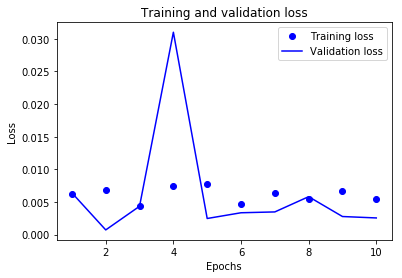

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

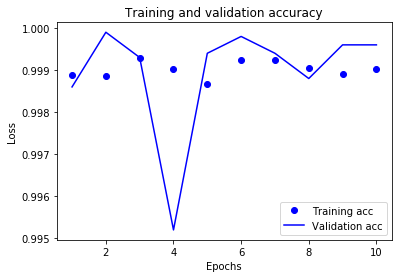

In [55]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Implement dropout

- Implement layer dropout after each layer from model 1 (except the last)
- Use a dropout rate of 0.5
